In [1]:
import sys
sys.path.append('./../')

import xml.etree.ElementTree as ET
import numpy as np
import ikamoana
import xarray as xr
import matplotlib.pyplot as plt
import os
import parcels
from ikamoana.utils import fieldToDataArray, convertToMeters

In [2]:
my_sim = ikamoana.IkaSeapodym('./../data/ikamoana_config/Field_Test_025_30.xml')
my_sim.loadFields()

 It will also add +1 to sigma_min. Cf. function documentation for more details.


/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),
/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),
/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),
/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),
/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow e

deltaT :  30.0
dt_seconds :  2592000.0
d_inf :  [1452.65010868]
d_max :  [4721.71977044]
deltaT :  30.0
dt_seconds :  2592000.0
d_inf :  [2082.74242257]
d_max :  [6769.78304314]
deltaT :  30.0
dt_seconds :  2592000.0
d_inf :  [2755.63850371]
d_max :  [8956.97644283]
deltaT :  30.0
dt_seconds :  2592000.0
d_inf :  [3453.29002123]
d_max :  [11224.63535355]
deltaT :  30.0
dt_seconds :  2592000.0
d_inf :  [4163.12175883]
d_max :  [13531.88506848]
deltaT :  30.0
dt_seconds :  2592000.0
d_inf :  [4868.62661081]
d_max :  [15825.07059734]


In [3]:
advection_x_ika = fieldToDataArray(my_sim.ocean.Tx) + fieldToDataArray(my_sim.ocean.U)
advection_y_ika = fieldToDataArray(my_sim.ocean.Ty) + fieldToDataArray(my_sim.ocean.V)
diffusion_ika = fieldToDataArray(my_sim.ocean.Ky)

time_length = len(diffusion_ika.time)

advection_x_sea = xr.load_dataarray("./../data/Inna/FreeGlorys-025x30/skj_cohort_advection_x_20080115-20100715.nc")
advection_y_sea = xr.load_dataarray("./../data/Inna/FreeGlorys-025x30/skj_cohort_advection_y_20080115-20100715.nc")
diffusion_sea = xr.load_dataarray("./../data/Inna/FreeGlorys-025x30/skj_cohort_diffusion_y_20080115-20100715.nc")

advection_x_sea = advection_x_sea[0,:time_length].loc[:, -39.5:50.5, 119.5:289.5]
advection_y_sea = advection_y_sea[0,:time_length].loc[:, -39.5:50.5, 119.5:289.5]
diffusion_sea = diffusion_sea[0,:time_length + 1].loc[:, -39.5:50.5, 119.5:289.5]

advection_x_sea = convertToMeters(advection_x_sea, timestep=30*24*60*60)
advection_y_sea = convertToMeters(advection_y_sea, timestep=30*24*60*60)
diffusion_sea = convertToMeters(diffusion_sea, timestep=30*24*60*60, square=True)

In [4]:
# [float(diffusion_sea[i].max() / diffusion_ika[i].max()) for i in range(diffusion_ika.time.size - 1)]

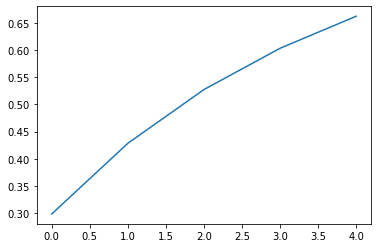

In [5]:
plt.plot([float(diffusion_sea[i].max() / diffusion_ika[i].max()) for i in range(diffusion_ika.time.size - 1)])

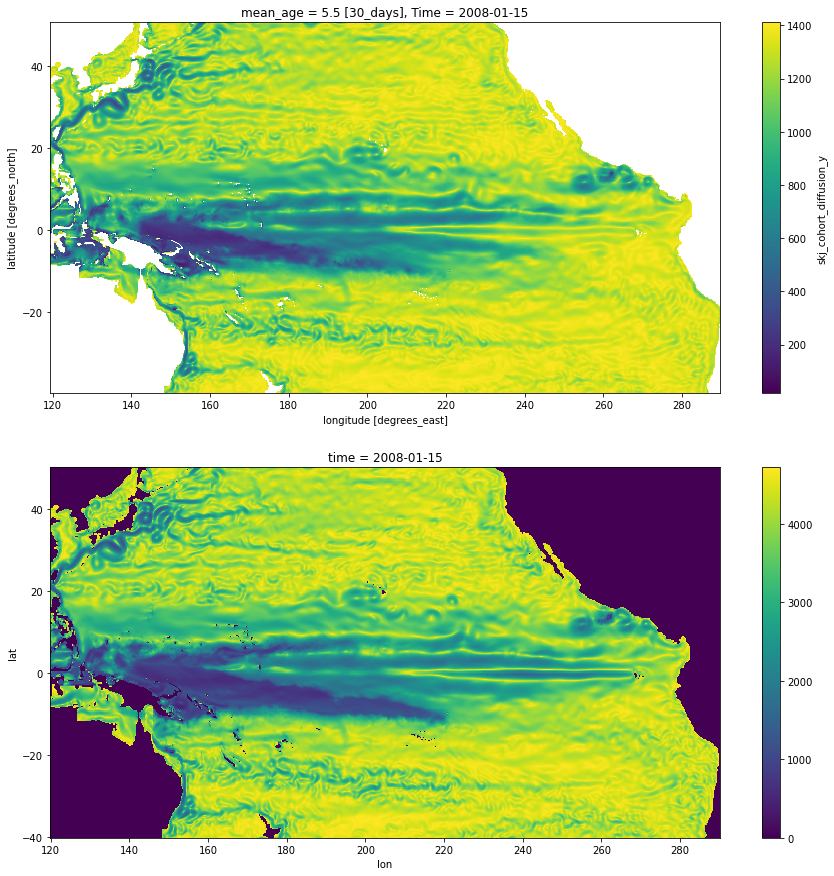

In [16]:
age_to_plot = 0

f,(a1,a2) = plt.subplots(2,1,figsize=(15,15))
diffusion_sea[age_to_plot].plot(ax=a1)
diffusion_ika[age_to_plot].plot(ax=a2)

In [7]:
print("MEAN :")
print(np.abs(advection_x_sea).mean().data)
print(np.abs(advection_y_sea).mean().data)
print(np.abs(diffusion_sea).mean().data)
print("MAX :")
print(np.abs(advection_x_sea).max().data)
print(np.abs(advection_y_sea).max().data)
print(np.abs(diffusion_sea).max().data)

MEAN :
0.05741146
0.025730474
5647.041
MAX :
1.1863059
1.6241242
13531.886


In [8]:
print("MEAN :")
print(np.abs(advection_x_ika).mean().data)
print(np.abs(advection_y_ika).mean().data)
print(np.abs(diffusion_ika).mean().data)
print("MAX :")
print(np.abs(advection_x_ika).max().data)
print(np.abs(advection_y_ika).max().data)
print(np.abs(diffusion_ika).max().data)

MEAN :
0.06960021
0.034957007
6143.3354
MAX :
1.5940635
1.9767367
15817.32


---

In [9]:
diffusion_sea

<xarray.DataArray 'skj_cohort_diffusion_y' (mean_age: 7, latitude: 361, longitude: 681)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 119.5 119.8 120.0 120.2 ... 289.0 289.2 289.5
  * latitude   (latitude) float64 -39.5 -39.25 -39.0 -38.75 ... 50.0 50.25 50.5
  * mean_age   (mean_age) float64 5.5 6.5 7.5 8.5 9.5 10.5 11.5
    Time       datetime64[ns] 2008-01-15

In [10]:
diffusion_ika

<xarray.DataArray (time: 6, lat: 361, lon: 681)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2008-01-15 2008-02-15 ... 2008-06-16
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... 49.25 49.5 49.75 50.0
  * lon      (lon) float32 120.0 120.2 120.5 120.8 ... 289.2 289.5 289.8 290.0